# Prediksi Hujan di Denpasar

Praktikum ini menggunakan _dataset_ [Denpasar Weather Data](https://www.kaggle.com/datasets/cornflake15/denpasarbalihistoricalweatherdata?select=openweatherdata-denpasar-1990-2020v0.1.csv) dengan modifikasi. _Dataset_ digunakan untuk melakukan prediksi penarikan kesimpulan kebenaran kondisi hujan pada kondisi tertentu. Hal itu diperoleh dengan meninjau `raining` (diekstrak dari `weather_main`) sebagai target. Fitur yang digunakan adalah sebagai berikut:
- `hour` (diekstrak dari `dt_iso`)
- `temp`
- `temp_min`
- `temp_max`
- `pressure`
- `humidity`
- `wind_speed`
- `wind_deg`

Tujuan praktikum:
1.   Peserta memahami rangkaian proses analitik data menggunakan pendekatan pembelajaran mesin. 
2.   Peserta memahami bahwa proses pengembangan model pembelajaran mesin juga ditentukan dari kualitas data, penanganan data, dan penentuan algoritma serta hiperparameternya; tidak cukup hanya dengan memastikan implementasi algoritma berjalan tanpa kesalahan.
3.   Peserta mampu menginterpretasikan hasil dari evaluasi model dalam proses analitik menggunakan pendekatan pembelajaran mesin.

Praktikum dilaksanakan secara berkelompok. Setiap kelompok terdiri atas 2 mahasiswa. Perhatikan bahwa terdapat berkas yang harus dikumpulkan sebelum waktu praktikum selesai (17 April 2023, pukul 10.59 WIB) dan berkas yang dikumpulkan setelah waktu praktikum selesai (17 April 2023, pukul 23.59 WIB).

# Persiapan Data

In [5]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [19]:
data = pd.read_csv("openweatherdata-denpasar-1990-2020v0.1-simplified.csv")
data

,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining
0,0,25.82,25.82,25.82,1010.0,86,1.36,225,True
1,1,26.20,26.20,26.20,1011.0,84,2.09,247,True
2,2,26.45,26.45,26.45,1011.0,84,2.44,262,True
3,3,26.80,26.80,26.80,1011.0,82,2.29,271,True
4,4,27.04,27.04,27.04,1010.0,82,1.71,274,False
...,...,...,...,...,...,...,...,...,...
264919,19,27.00,27.00,27.00,1007.0,94,4.10,300,False
264920,20,27.00,27.00,27.00,1007.0,94,5.70,300,False
264921,21,28.00,28.00,28.00,1007.0,83,6.70,290,False
264922,22,28.00,28.00,28.00,1007.0,83,6.20,290,False


In [13]:
X = data.drop(columns="raining")
y = data["raining"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

df_train = pd.concat([X_train, y_train], axis=1)
df_val = pd.concat([X_val, y_val], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

#Cek
print("Xval : ", X_val.shape[0])
print("Yval : ", y_val.shape[0])
print("Persentase Xval: ", X_val.shape[0]/data.shape[0])
print("Persentase Yval: ", y_val.shape[0]/data.shape[0])

print("Xtrain : ", X_train.shape[0])
print("Ytrain : ", y_train.shape[0])
print("Persentase Xtrain: ", X_train.shape[0]/data.shape[0])
print("Persentase Ytrain: ", y_train.shape[0]/data.shape[0])

Xval :  42388
Yval :  42388
Persentase Xval:  0.16000060394679227
Persentase Yval:  0.16000060394679227
Xtrain :  169551
Ytrain :  169551
Persentase Xtrain:  0.6399986411197174
Persentase Ytrain:  0.6399986411197174


# Soal

Disediakan data yang sudah dibagi menjadi data latih (`df_train`), data validasi (`df_val`), dan data uji (`df_test`).

**Bagian 1**: (batas waktu: 17 April 2023, 10.59 WIB)

1. Buatlah _baseline_ dengan menggunakan model _logistic regression_.
2. Lakukan analisis data terkait hal berikut:
    - _duplicate value_,
    - _missing value_,
    - _outlier_,
    - _balance of data_.
3. Jelaskan rencana penanganan yang ada pada poin 2.
4. Jelaskan teknik _encoding_ yang digunakan terhadap data yang disediakan, disertai dengan alasan.
5. Buatlah desain eksperimen dengan menentukan hal berikut:
    - tujuan eksperimen,
    - variabel dependen dan independen,
    - strategi eksperimen,
    - skema validasi.
    
**Bagian 2**: (batas waktu: 17 April 2023, 23.59 WIB)

6. Implementasikan strategi eksperimen dan skema validasi yang telah ditentukan pada poin 5.
7. Berdasarkan hasil prediksi yang dihasilkan, buatlah kesimpulan analisis karakteristik kondisi hujan.

---

Jika terdapat perubahan jawaban pada poin 1—5 (contoh: perbedaan penanganan _outlier_), jelaskan pada laporan mengenai jawaban sebelum, jawaban sesudah, dan alasan pengubahan jawaban.

Pada sel ini, jelaskan pembagian tugas/kerja per anggota kelompok dalam eksperimen.

# _Deliverable_

_Deliverable_ yang akan dihasilkan adalah sebagai berikut:
1. berkas _notebook_ dengan format nama `PraktikumIF3270_M1_NIM1_NIM2.ipynb` untuk Bagian 1;
2. berkas _notebook_ dengan format nama `PraktikumIF3270_M2_NIM1_NIM2.ipynb` untuk Bagian 1 + Bagian 2; serta
3. berkas laporan dengan format nama `PraktikumIF3270_NIM1_NIM2.pdf` yang mencakup hal berikut:
    - hasil analisis data,
    - penanganan dari hasil analisis data,
    - justifikasi teknik-teknik yang dipilih,
    - perubahan yang dilakukan pada jawaban poin 1—5 jika ada,
    - desain eksperimen,
    - hasil eksperimen.
    - analisis dari hasil eksperimen,
    - kesimpulan,
    - pembagian tugas/kerja per anggota kelompok

Batas waktu pengumpulan:
- _Deliverable_ poin 1: Senin, 17 April 2023, pukul 10.59 WIB
- _Deliverable_ poin 2: Senin, 17 April 2023, pukul 23.59 WIB
- _Deliverable_ poin 3: Senin, 17 April 2023, pukul 23.59 WIB

## No 1
Membuat baseline dengan model logistic regression

NILAI METRICS

Nilai Precision: 0.5940438871473355
Nilai Recall: 0.13542969447918526
Nilai accuracy: 0.8736198924223837
Nilai F1 Score: 0.22057325767495994

CONFUSION MATRIX



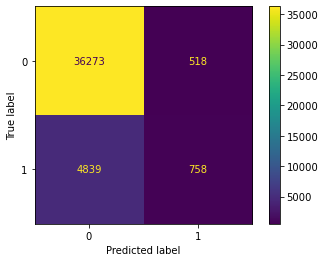

CROSS VALIDATION

Menghasilakan akurasi sebesar 0.87 dengan standar deviasi sebesar 0.00


In [14]:
log_reg = LogisticRegression(random_state=0).fit(X_train, y_train)

pred = log_reg.predict(X_val)

# Nilai metrics
print("NILAI METRICS\n")
print(f"Nilai Precision: {precision_score(y_val, pred)}")
print(f"Nilai Recall: {recall_score(y_val, pred)}")
print(f"Nilai accuracy: {accuracy_score(y_val, pred)}")
print(f"Nilai F1 Score: {f1_score(y_val, pred)}")

# Confusion matrix
print("\nCONFUSION MATRIX\n")
con_matrix = confusion_matrix(y_val, pred)
ConfusionMatrixDisplay(confusion_matrix=con_matrix).plot()
plt.show()

# Cross validation
print("CROSS VALIDATION\n")
scores = cross_val_score(log_reg, X_train, y_train, cv=10)
print("Menghasilakan akurasi sebesar %0.2f dengan standar deviasi sebesar %0.2f" % (scores.mean(), scores.std()))


## No 2
### Analisis Data

#### Duplicate Value

In [19]:
print(data[data.duplicated()])
print(f"\nJumlah data duplicated: {data.duplicated().sum()}")
percentage = (data.duplicated().sum() / len(data)) * 100
print("Persentase data yang duplicate adalah sebesar {:.2f} %".format(percentage))

        hour   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
8773       0  26.68     26.68     26.68    1009.0        84        3.07   
8940      23  26.60     26.60     26.60    1009.0        88        6.20   
8941       0  26.60     26.60     26.60    1009.0        88        6.20   
8942       1  26.60     26.60     26.60    1009.0        88        6.20   
17543      0  26.28     26.28     26.28    1011.0        85        0.49   
...      ...    ...       ...       ...       ...       ...         ...   
264664     9  30.07     30.00     30.20    1007.0        79        3.10   
264744    12  27.90     27.70     28.00    1010.0        83        1.00   
264756     0  28.00     28.00     28.00    1011.0        83        1.00   
264784     4  31.00     31.00     31.00    1011.0        70        4.10   
264881     5  30.00     30.00     30.00    1008.0        74        5.10   

        wind_deg  raining  
8773         287     True  
8940         300    False  
8941         30

Terlihat pada hasil yang tampil di atas, terdapat data yang duplicate sebanyak 7253 data. Persentase data yang duplicate dari keseluruhan data adalah sebesar 2.74 %. Hal ini relatif cukup kecil.

#### Missing Value

In [8]:
data.isna().sum()

hour          0
temp          0
temp_min      0
temp_max      0
pressure      0
humidity      0
wind_speed    0
wind_deg      0
raining       0
dtype: int64

Terlihat pada hasil yang ditampilkan di atas, tidak terdapat kolom yang mengalami missing value. Oleh karena itu, penanganan missing value tidak diperlukan.

#### Outlier

In [23]:
numeric_cols = data.select_dtypes(include="number").columns
for column in numeric_cols:
    # Calculate IQR for the column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers in the column
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    # Print the number of outliers and their values
    print("Outliers in", column)
    print(outliers[column].values)
    print("Number of outliers:", len(outliers))

Outliers in hour
[]
Number of outliers: 0
Outliers in temp
[20.9  20.9  20.9  ... 33.7  32.66 34.  ]
Number of outliers: 1458
Outliers in temp_min
[32.4 32.4 32.4 ... 33.2 33.2 34. ]
Number of outliers: 1716
Outliers in temp_max
[20.9 20.9 20.9 21.2 21.2 21.2 20.5 20.5 20.5 33.6 33.6 33.6 33.8 33.8
 33.8  3.   3.  34.1 34.1 34.1 33.8 33.8 34.2 34.2 34.2 21.  21.  21.
 21.4 21.4 21.4 21.  21.  21.  21.  21.  20.  21.  20.  21.  21.  21.
 20.  21.  21.  21.  21.  21.  20.2 19.  19.  21.  21.  21.  21.  21.
 21.2 20.  20.2 19.  19.  21.  21.  21.  21.4 21.  20.  20.  21.  20.
 20.  20.2 20.  21.  21.  20.9 21.  20.  21.  21.  20.  21.  21.  21.
 34.  34.  20.7 21.  21.2 21.2 20.  20.  20.  20.  20.  19.  19.  21.
 21.  21.  21.  21.  20.8 20.  21.  21.  20.8 20.8 21.  21.1 21.1 21.
 21.  20.  21.  20.  34.2 21.  21.  20.  21.4 21.  20.  21.  21.  20.
 21.  21.  21.2 21.2 21.2 21.2 21.  21.  21.2 21.2 21.  21.  21.  21.
 21.  21.  20.8 19.  19.  21.  20.4 19.  21.  20.8 20.  21.  21.  34.


Balance Of Data

False    230023
True      34901
Name: raining, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

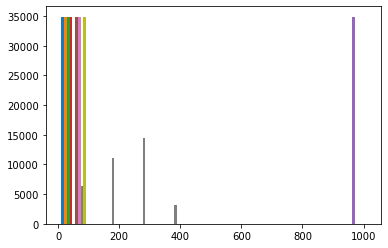

In [21]:
# melihat jumlah data di setiap kategori
print(data['raining'].value_counts())
raining=data[raining]
plt.hist(raining)
plt.show


### No 3

In [22]:
data.corr()

,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining
hour,1.000000,-0.525264,-0.517920,-0.525277,-0.038128,0.509068,-0.200925,-0.045260,0.083878
temp,-0.525264,1.000000,0.990006,0.990866,-0.330157,-0.704173,0.146250,0.099441,-0.209792
temp_min,-0.517920,0.990006,1.000000,0.964316,-0.322168,-0.695061,0.142454,0.099499,-0.207823
temp_max,-0.525277,0.990866,0.964316,1.000000,-0.330576,-0.701721,0.147038,0.096501,-0.207877
pressure,-0.038128,-0.330157,-0.322168,-0.330576,1.000000,0.005284,-0.010681,-0.315603,-0.092652
humidity,0.509068,-0.704173,-0.695061,-0.701721,0.005284,1.000000,-0.291652,0.031189,0.296700
wind_speed,-0.200925,0.146250,0.142454,0.147038,-0.010681,-0.291652,1.000000,0.090482,0.037894
wind_deg,-0.045260,0.099441,0.099499,0.096501,-0.315603,0.031189,0.090482,1.000000,0.154758
raining,0.083878,-0.209792,-0.207823,-0.207877,-0.092652,0.296700,0.037894,0.154758,1.000000


Duplicate Value

Missing Value

In [ ]:
Karena data yang mengandung missing values hanya pada kolom bmi dan hanya terdapat 201 rows missing values, maka akan data yang kosong tersebut akan diisi dengan median dari seluruh value yang ada pada kolom **bmi**. Aksi ini diambil dengan pertimbangan, jika data tersebut dihapus, maka jumlah data akan berkurang sebanyak 201 data.

Outliers

Outliers
Outliers in hour
Number of outliers: 0

Outliers in temp
Number of outliers: 1458

Outliers in temp_min
Number of outliers: 1716


Outliers in temp_max
Number of outliers: 547


Outliers in pressure
Number of outliers: 1067

Outliers in humidity
Number of outliers: 231

Outliers in wind_speed
Number of outliers: 3439

Outliers in wind_deg
Number of outliers: 0


Berdasarkan data diatas, terdapat fitur dengan outliers 3439 dari 260ribuan, yang mana hanya sekitar 1-2% dari dataset. 
Berdasrkan hal tersebut, kami memeriksa kembali dari korelasi yang didapatkan nilai yang tidak terlalu signifikan, sehingga kami merasa tidak perlu ada penanganan untuk kasus ini.



Balance Of Data